## May report TIC


# Import libraries


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Reading data

In [61]:
df = pd.read_csv("data.csv", sep=";")

df = df.rename(columns={'Дата': 'Date', 'Гости': 'Guests', 'Количество': 'Amount', 'Город': 'City',
                        'Цель визита': 'Purpose_of_visit_1', 'Цель визита_1': 'Purpose_of_visit_2',
                        'Полиграфия': 'Polygraphy', 'Комментарии / пожелания / вопросы': 'Comments'})
df['City'] = df['City'].fillna("Тверь")
df['City'] = df['City'].replace(' ', "Тверь")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                585 non-null    object 
 1   Guests              585 non-null    object 
 2   Amount              578 non-null    float64
 3   City                585 non-null    object 
 4   Purpose_of_visit_1  513 non-null    object 
 5   Purpose_of_visit_2  60 non-null     object 
 6   Polygraphy          124 non-null    object 
 7   Comments            13 non-null     object 
dtypes: float64(1), object(7)
memory usage: 36.7+ KB


In [63]:
df.head()

,Date,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
0,01.06.2024,Семья с детьми,3.0,Тверь,Просто посмотреть,NaN,Да,NaN
1,01.06.2024,Группа,3.0,Тверь,Сувениры,Почта,NaN,NaN
2,01.06.2024,Семья с детьми,2.0,Тверь,Полиграфия,NaN,Да,NaN
3,01.06.2024,Группа,2.0,Тверь,Просто посмотреть,NaN,NaN,NaN
4,01.06.2024,Семья с детьми,2.0,Тверь,Сувениры,NaN,Да,NaN


In [64]:
df.tail()

,Date,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
580,30.06.2024,Группа,2.0,Моск обл,Сувениры,Печатные карты,Да,NaN
581,30.06.2024,Семья с детьми,3.0,Москва,Сувениры,NaN,NaN,NaN
582,30.06.2024,Семья с детьми,2.0,Тверь,Сувениры,NaN,NaN,NaN
583,30.06.2024,Старше 35 лет,1.0,Москва,Просто посмотреть,NaN,NaN,NaN
584,30.06.2024,Группа,2.0,Тверь,Просто посмотреть,Экскурсии,NaN,NaN


## Data cleaning

Adding column for weekday

In [65]:
# """ Now I want to add column for weekdays. In process, I realised that I need to change the date format 
#     for my own comfort. I managed those things like this """
df.Date = df.Date.str.split(".").str[::-1].str.join("-")

weekday = pd.to_datetime(df.Date).dt.day_name()
df.insert(1, 'Weekday', weekday)
df.head()

,Date,Weekday,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
0,2024-06-01,Saturday,Семья с детьми,3.0,Тверь,Просто посмотреть,NaN,Да,NaN
1,2024-06-01,Saturday,Группа,3.0,Тверь,Сувениры,Почта,NaN,NaN
2,2024-06-01,Saturday,Семья с детьми,2.0,Тверь,Полиграфия,NaN,Да,NaN
3,2024-06-01,Saturday,Группа,2.0,Тверь,Просто посмотреть,NaN,NaN,NaN
4,2024-06-01,Saturday,Семья с детьми,2.0,Тверь,Сувениры,NaN,Да,NaN


NOT USING
df['Date'].unique()
"""06-05, 06-11, 06-27 is missing"""

""" 06-05 """
df.index[df['Date'] == "2024-06-06"][0]  # 63
df.loc[63] = ["2024-06-05", pd.to_datetime("2024-06-05").day_name(), np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan]
df = df.sort_index()

df[61:66]
"""06-11"""
df.index[df['Date'] == "2024-06-12"][0]  # 156
df.loc[156] = ["2024-06-11", pd.to_datetime("2024-06-11").day_name(), np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan]
df = df.sort_index()

df[154:159]
"""06-27"""
df.index[df['Date'] == "2024-06-28"][0]  # 464
df.loc[464] = ["2024-06-27", pd.to_datetime("2024-06-27").day_name(), np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan]
df = df.sort_index()

df[462:467]

Amount of empty dates

In [66]:
df['Date'].unique()

array(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
       '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
       '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
       '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16',
       '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
       '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
       '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
       '2024-06-29', '2024-06-30'], dtype=object)

Let's look at our cities and fix them

In [67]:
df.City = df.City.str.lstrip().str.rstrip().str.title()
df.City = df.City.fillna('Тверь')
df.City.unique()

array(['Тверь', 'Москва', 'Новороссийск', 'Нижний Новгород', 'Волгоград',
       'Санкт-Петерберг', 'Санкт-Петербург', 'Мсква', 'Щелково Моск Обл',
       'Смоленск', 'Питер И Москва', 'Бологое', 'Мурманск', 'Одинцово',
       'Клин', 'Екатеринбург', 'Конаково', 'Тверь/Волгоград', 'Моск.Обл',
       'Иваново', 'Ярославль', 'Южно Сахалинск', 'Спб', 'Мск',
       'Сосновый Бор, Ленин. Обл', 'Новосибирск', 'Кострома', 'Петербург',
       'Тверская Обл', 'Самара', 'Моск.Обл.', 'Питер', 'Моск Область',
       'Москвы', 'Астана', 'Мытищи', 'Барнаул', 'Краснодарский Край',
       'Воркута', 'Владимир', 'Моск Обл'], dtype=object)

In [68]:
# df.loc[df['City'] == 'Астана']
# df.loc[df['City'] == 'Питер И Москва']

In [69]:
df = df.replace(["Питер", "Петербург", "Санкт-Петерберг", "Питер И Москва", "Спб",\
                  "Сосновый Бор, Ленин. Обл"], "Санкт-Петербург")
df = df.replace(["Москвы", "Мсква", "Мск"], "Москва")
df = df.replace(["Моск.Обл.", "Московская Обл", "Мо", "Подмосковье", "Щелково Моск Обл",\
                  "Моск Обл", "Моск.Обл", "Моск Область"], "Московская Область")
df = df.replace("Щелково Моск Обл", "Московская область")
df = df.replace("Тверь/Волгоград", "Волгоград")
df = df.replace("Тверская Обл", "Тверь")
df.City.unique()

array(['Тверь', 'Москва', 'Новороссийск', 'Нижний Новгород', 'Волгоград',
       'Санкт-Петербург', 'Московская Область', 'Смоленск', 'Бологое',
       'Мурманск', 'Одинцово', 'Клин', 'Екатеринбург', 'Конаково',
       'Иваново', 'Ярославль', 'Южно Сахалинск', 'Новосибирск',
       'Кострома', 'Самара', 'Астана', 'Мытищи', 'Барнаул',
       'Краснодарский Край', 'Воркута', 'Владимир'], dtype=object)

Change 'Amount' column type to int. Fill empty cells

In [70]:
df.index[df['Amount'].isna()]  # Index([86, 106, 107, 108, 119, 128, 141], dtype='int64')
df['Amount'] = df['Amount'].interpolate(method="linear")


df['Amount'] = df['Amount'].astype("int8")
df.head()

,Date,Weekday,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
0,2024-06-01,Saturday,Семья с детьми,3,Тверь,Просто посмотреть,NaN,Да,NaN
1,2024-06-01,Saturday,Группа,3,Тверь,Сувениры,Почта,NaN,NaN
2,2024-06-01,Saturday,Семья с детьми,2,Тверь,Полиграфия,NaN,Да,NaN
3,2024-06-01,Saturday,Группа,2,Тверь,Просто посмотреть,NaN,NaN,NaN
4,2024-06-01,Saturday,Семья с детьми,2,Тверь,Сувениры,NaN,Да,NaN


## Adding plot functions

Groupby + Amount

In [71]:
def bar_groupby_amount(data: pd.DataFrame, on: str, top: int, title: str =None, xlabel: str =None, ylabel: str =None):
    """
    Takes a column name to groupby on ('Sex', 'Date' etc) and creates bar plot with top 'Amount' values.

    Args:
        on (str): Column name in DataFrame to groupby on, e.g. 'Date', 'Purpose', 'Order'.
        top (int): Top N+1 values to be shown in the plot (N actual bars and 1 'Other' bar), e.g. 3, 5, 12.
    """

    # Check if given column name is present in DataFrame
    if on not in data.columns:
        print(f"ParameterError (on), '{on}' not in df.columns!")
        return
    
    # Group DataFrame on given column and count all visitors
    df_groupby = data.groupby(on)['Amount'].sum()
    
    # DataFrame for plotting
    df_plot = df_groupby.copy()
    df_plot = df_plot.sort_values(ascending=False)
    # Calculate 'Other' bar
    df_plot['Другие'] = df_plot.sum() - df_plot[:top].sum()
    df_plot = df_plot.sort_values(ascending=False)[:top+1]

    # Plotting 
    figure = plt.figure(figsize=(16, 8))  
    plt.title(title)
    df_plot.plot(kind='bar')
    plt.xticks(rotation=15)
    plt.xlabel(xlabel)

    top_value = round(max(df_plot) + 10, -2)
    step = -10 if top_value <= 100 else -25*(len(str(top_value))-1)
    plt.yticks(range(top_value, -1, step))
    plt.ylabel(ylabel)

    y_axis = df_plot.axes[0].to_list()
    for i in range(len(y_axis)):
        plt.annotate(df_plot.iloc[i], (i, df_plot.iloc[i]))

    plt.show()
    plt.close()



Pie + groupby

In [72]:
def pie_groupby_amount(data: pd.DataFrame, on: str, top: int, title: str =None, xlabel: str =None, ylabel: str =None):
    """
    Takes a column name to groupby on ('Sex', 'Date' etc) and creates bar plot with top 'Amount' values.

    Args:
        on (str): Column name in DataFrame to groupby on, e.g. 'Date', 'Purpose', 'Order'.
        top (int): Top N+1 values to be shown in the plot (N actual bars and 1 'Other' bar), e.g. 3, 5, 12.
    """

    # Check if given column name is present in DataFrame
    if on not in data.columns:
        print(f"ParameterError (on), '{on}' not in df.columns!")
        return
    
    # Group DataFrame on given column and count all visitors
    df_groupby = data.groupby(on)['Amount'].sum()
    
    # DataFrame for plotting
    df_plot = df_groupby.copy()
    df_plot = df_plot.sort_values(ascending=False)
    # Calculate 'Other' bar
    df_plot['Другие'] = df_plot.sum() - df_plot[:top].sum()
    df_plot = df_plot.sort_values(ascending=False)[:top+1]

    # Plotting 
    figure = plt.figure(figsize=(16, 8))  
    plt.title(title)
    df_plot.plot(kind='pie', autopct="%1.1f%%")
    plt.xticks(rotation=15)
    plt.xlabel(xlabel)


    plt.show()
    plt.close()


# Data analysis

Count all guests

In [73]:
totalGuests = df['Amount'].sum()
totalGuests

1403

In [74]:
df.groupby('City')['Amount'].sum()

City
Астана                   4
Барнаул                  3
Бологое                  3
Владимир                 2
Волгоград                4
Воркута                  3
Екатеринбург             3
Иваново                  3
Клин                     3
Конаково                 3
Кострома                 1
Краснодарский Край       2
Москва                 152
Московская Область      12
Мурманск                 7
Мытищи                   2
Нижний Новгород          4
Новороссийск             3
Новосибирск              1
Одинцово                 2
Самара                   2
Санкт-Петербург         38
Смоленск                 2
Тверь                 1137
Южно Сахалинск           4
Ярославль                3
Name: Amount, dtype: int64

Group by city


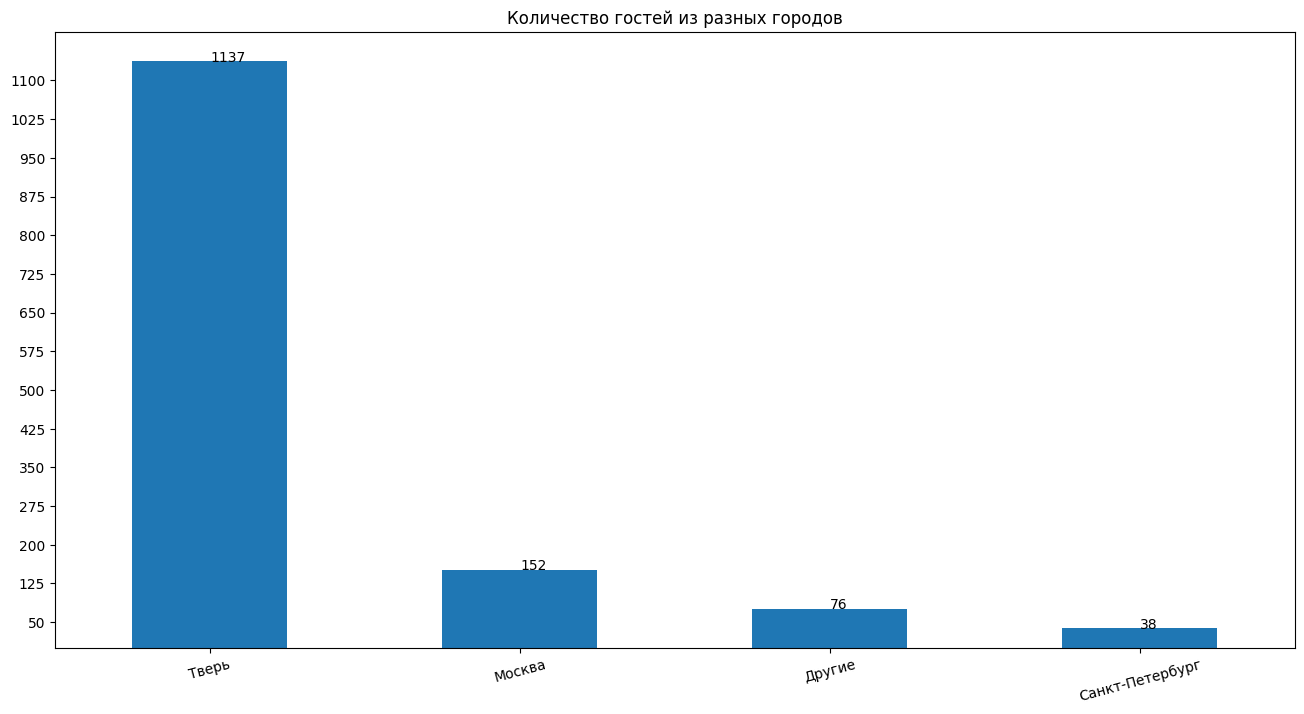

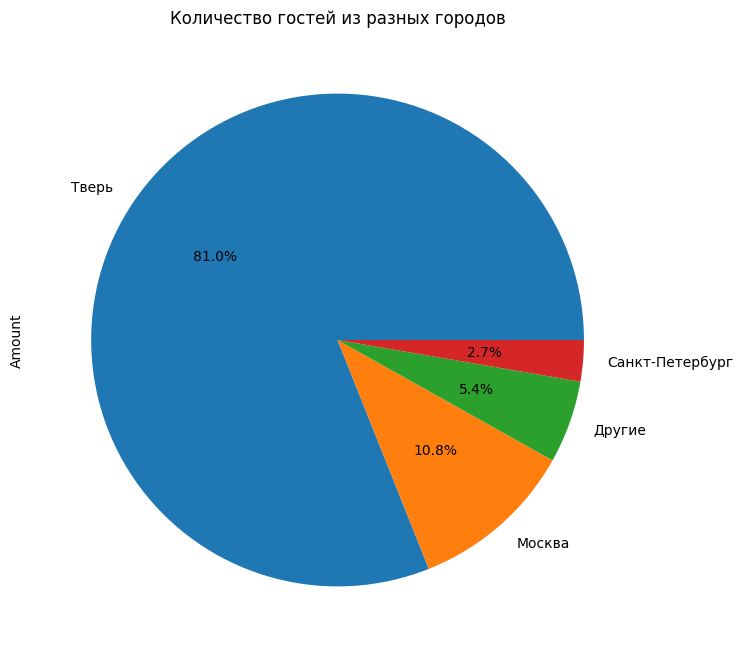

In [75]:
bar_groupby_amount(data=df, on='City', top=3, title="Количество гостей из разных городов")
pie_groupby_amount(data=df, on='City', top=3, title="Количество гостей из разных городов")

Cities with less visitors

<Axes: xlabel='City'>

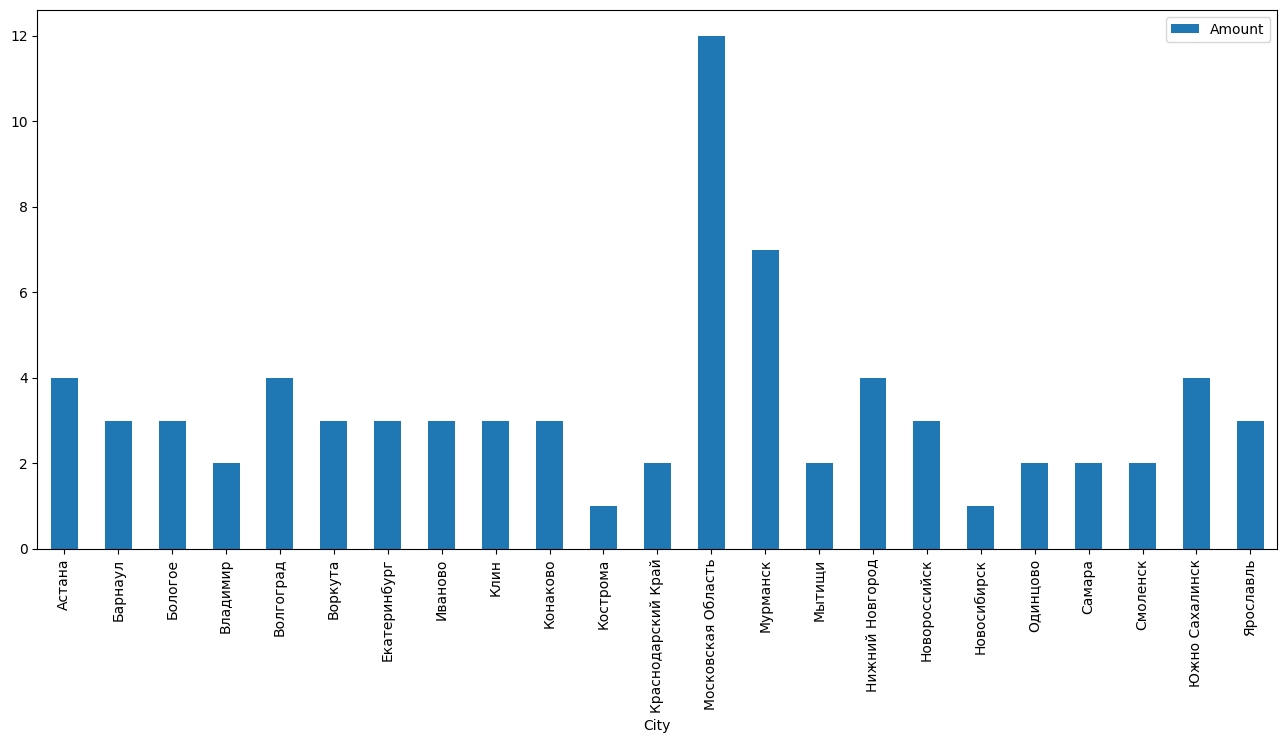

In [76]:
df_no_tver = df.query('City != "Тверь" & City != "Москва" & City != "Санкт-Петербург"').reset_index()
df_no_tver = df_no_tver.groupby('City').sum()
df_no_tver
# a.head()
# df_no_tver.head()
# plot_groupby_amount(data=df_no_tver, on='City', top=10, title="Количество гостей из разных городов")
df_no_tver.plot.bar(y='Amount', figsize=(16,7))

Group by purpose of visit 1

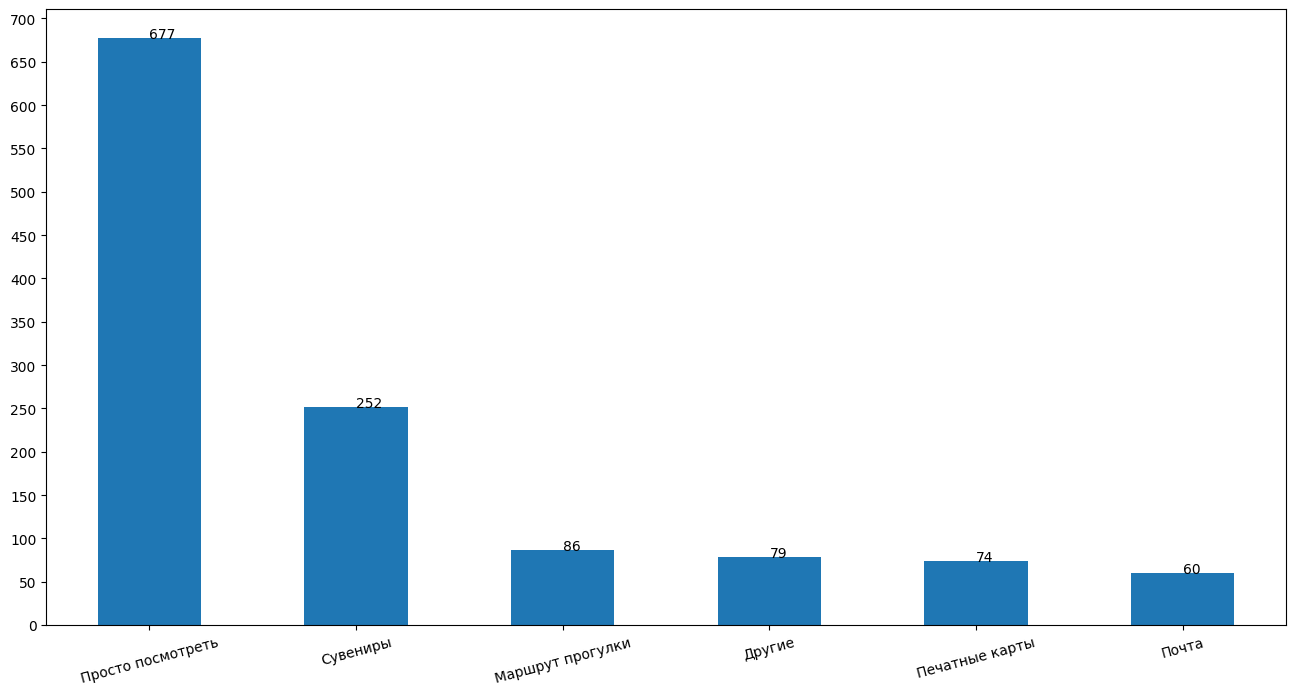

In [77]:
bar_groupby_amount(data=df, on='Purpose_of_visit_1', top=5)

Group by purpose of visit 2


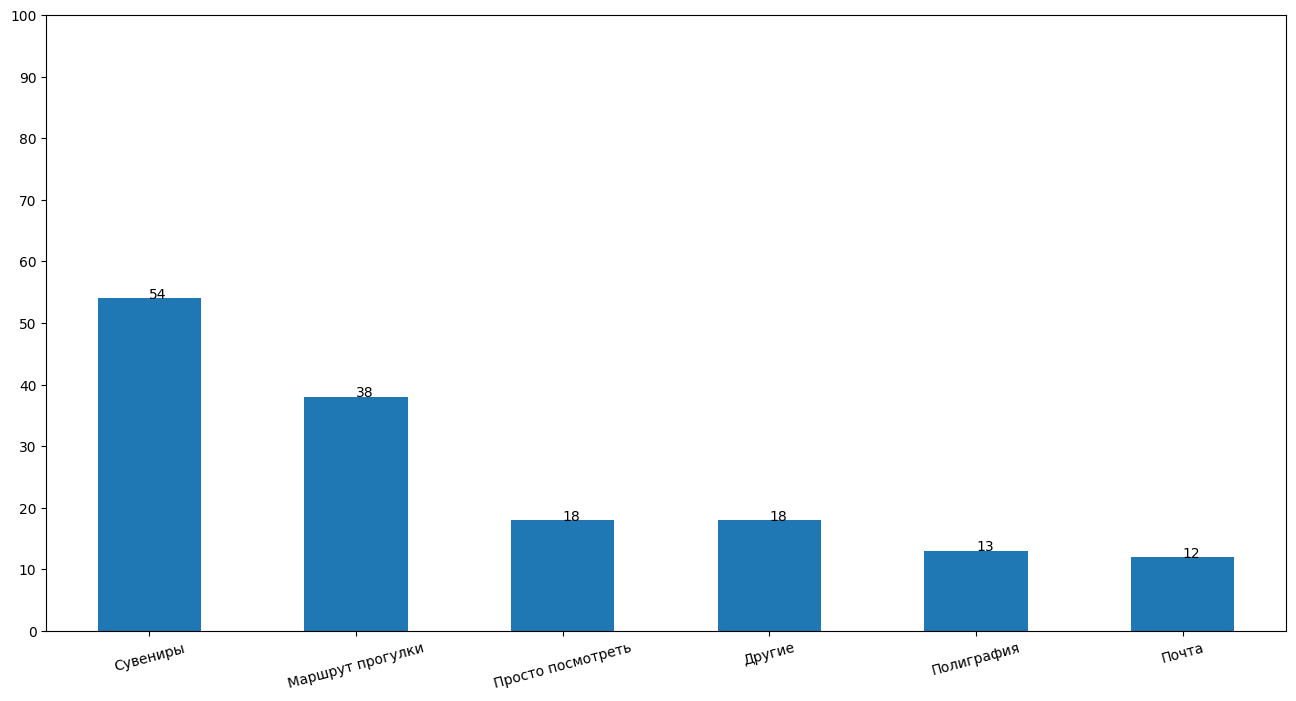

In [78]:
bar_groupby_amount(data=df, on='Purpose_of_visit_2', top=5)

All comments

In [79]:
for comment in df['Comments'].unique():
    if comment != comment:
        continue
    print(comment)

отправили открыкти
спросили про колокольчики с Тверь
отправили открытки, купили "Добрую керамику"
Автобусные экскурсии в Торжок
Автобусные экскурсии Торжок/ Плещеево/ Вышний Волочек
Экскурсия к Ржевскому мемориалу
почта
водные экскурсии
гостиницы
1


Hidden
totalCities = df.groupby('City')['Amount'].sum()
totalCities

plotCities = totalCities.copy()
plotCities = plotCities.sort_values(ascending=False)
plotCities['Другие'] = plotCities.sum() - sum(plotCities[:3])
plotCities = plotCities.sort_values(ascending=False)[:4]

plt.figure(figsize=(16, 8))  
plt.title('Количество гостей за май в зависимости от города')
plotCities.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Город")
plt.yticks(range(max(plotCities), -1, -50))
cities = plotCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(plotCities.iloc[i], (i, plotCities.iloc[i]))
plt.show()
plt.close()

# 

Let's plot data about our daily visitors

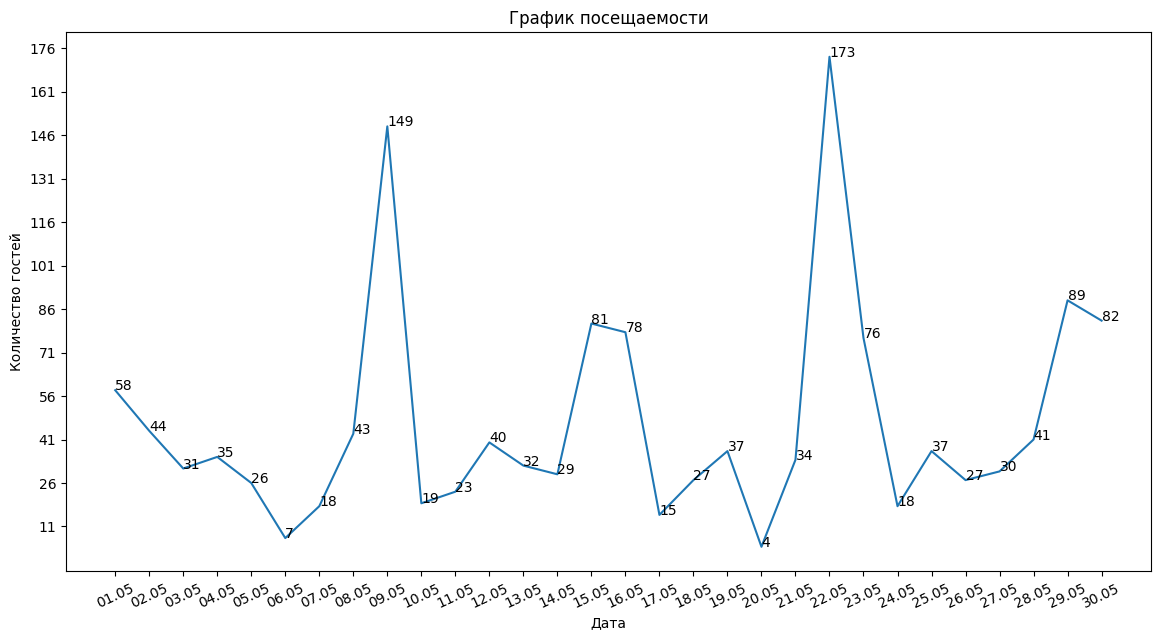

In [80]:
group_by_date = df.groupby('Date')['Amount'].sum()
group_by_date

plot_visitors = group_by_date

dates = []
for x in range(1, 30 + 1):
    if x < 10:
        dates.append(f'0{x}.05')
    else:
        dates.append(f'{x}.05')

plt.figure(figsize=(14, 7))
plt.plot(dates, plot_visitors)
plt.title('График посещаемости')
plt.xlabel('Дата')
plt.ylabel('Количество гостей')
plt.xticks(rotation=25)
plt.yticks(range(max(plot_visitors) + 3, -1, -15))
for i in range(len(dates)):
    plt.annotate(plot_visitors.iloc[i], (i, plot_visitors.iloc[i]))
plt.show()

In [81]:
day_visits = df.groupby('Date').sum()[['Amount']]
june_predict = df.groupby('Date').first()[['Weekday']]
june_predict['Amount'] = day_visits

In [82]:
june_predict.head()

,Weekday,Amount
Date,,
2024-06-01,Saturday,58
2024-06-02,Sunday,44
2024-06-03,Monday,31
2024-06-04,Tuesday,35
2024-06-05,Wednesday,26


In [83]:
june_predict.tail()

,Weekday,Amount
Date,,
2024-06-26,Wednesday,27
2024-06-27,Thursday,30
2024-06-28,Friday,41
2024-06-29,Saturday,89
2024-06-30,Sunday,82


In [84]:
# predict_file = open(r"C:\Users\1\DataAnalyticsProjects\ТИЦ\Prediction\prediction.csv", mode="w")
june_predict.to_csv(path_or_buf=r"C:\Users\1\DataAnalyticsProjects\ТИЦ\Prediction\prediction.csv", mode='a')